In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sci 
!pip install scikit-learn


from google.colab import drive 
drive.mount ('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive


In [ ]:
# import os 
# import tarfile 
# import urllib

# # Function to get the data (from any device)
# DOWNLOAD_ROOT = "https:// raw.githubusercontent.com/ ageron/ handson-ml2/ master/" 
# HOUSING_PATH = os.path.join(" datasets", "housing") 
# HOUSING_URL = DOWNLOAD_ROOT + "datasets/ housing/ housing.tgz"

# def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH) :
#   os.makedirs(housing_path, exist_ok=True)
#   tgz_path = os.path.join(housing_path, "housing.tgz")
#   urllib.request.urlretrieve( housing_url, tgz_path) 
#   housing_tgz = tarfile.open( tgz_path)
#   housing_tgz.extractall(path=housing_path)
#   housing_tgz.close()

# # Function to load dataset as df

# def load_housing_data(housing_path=HOUSING_PATH):
#   csv_path = os.path.join(housing_path, "housing.csv")
#   return pd.read_csv(csv_path)

# housing = load_housing_data()
# housing.head()

In [ ]:
from pandas.io.parsers.readers import read_csv
housing_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ouside_of_Class/datasets/housing_bay_area.csv")

In [ ]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [ ]:
housing_df.info()
print()
print(housing_df["ocean_proximity"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [ ]:
housing_df.describe()
#NOTE: The median income column is adjusted to be a reduced ratio of 1%, I think
#NOTE: Also, the bedrooms column looks really weird to me, may end up getting rid of it.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


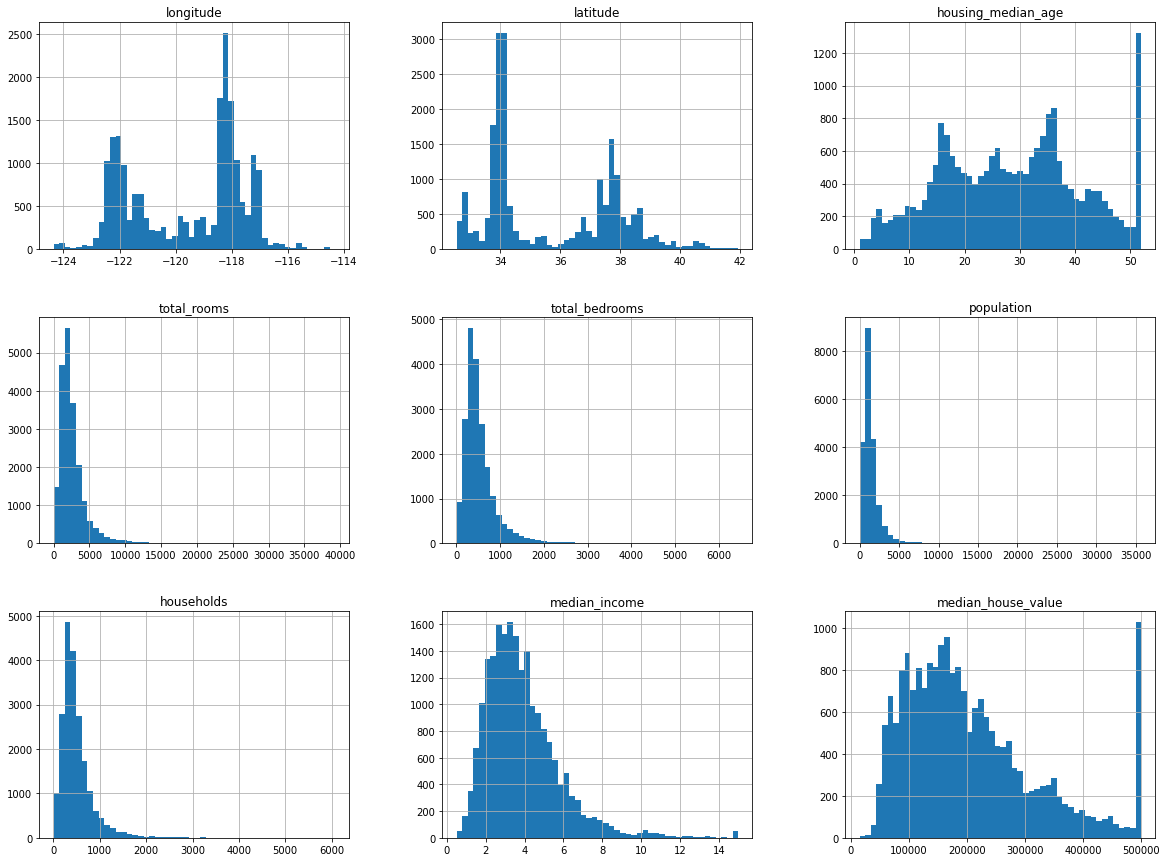

In [ ]:
import matplotlib.pyplot as plt

housing_df.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
# Set some data aside for future testing 

# Function to do so
def split_train_test(data, test_ratio) :
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data)* test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices],data.iloc[test_indices]

train_set, test_set = split_train_test(housing_df, 0.2)
print(len(train_set))
print(len(test_set))

# The better way to do this is by using a package by sklearn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_df, test_size=0.2, random_state=42)



16512
4128


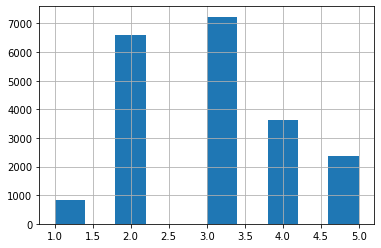

In [ ]:
# Because the median income value is very skewed, we are going to run a bin function to clean it up
# Essentially, we need to insure each "category"/bins of housing prices have enough rows for our model to accurately predict in that range.

housing_df["income_category"] = pd.cut(housing_df["median_income"], bins = [0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])
# NOTE: np.inf is specifying a bin for 6+, which should remove some skewness and impprove the accuracy of our model
# Also, the pd.cut is going to replace the median_income col with our new, binned income_category column

housing_df["income_category"].hist()


In [ ]:
# This was on page 55, but couldn't figure out how to define text_index correctly. Not essential for the pipeline however

# from operator import index
#  # Stratified Sampling time based on our new "income_category" col
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=42)

# Add index so it can use the proper parameters
from zlib import crc32
def test_set_check( identifier, test_ratio): 
  return crc32( np.int64( identifier)) & 0xffffffff < test_ratio * 2** 32

def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing_df.reset_index() # adds an ` index ` column train_set, test_set = split_train_test_by_id( housing_with_id, 0.2, "index")
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")


for train_index, text_index in split.split(housing_df, housing_df["income_category"]):
  strat_train_set = housing_df.loc[train_index]
  strat_test_set = housing_df.loc[text_index]

In [ ]:
# # OK so the last bit was really just to test the test data....lets get rid of that binned column
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_category", axis=1, inplace=True)

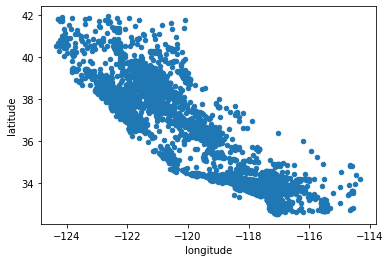

In [ ]:
# Data Visualization
# Start with location
# Make a copy of the training set as to avoid messing it up
housing_df = strat_train_set.copy()

housing_df.plot(kind="scatter", x="longitude", y="latitude")
# Looks like California!

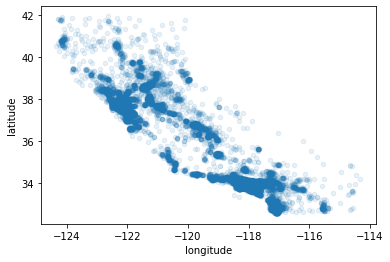

In [ ]:
# Same idea as before, but with an additional parameter that shows the density much better.
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.1)

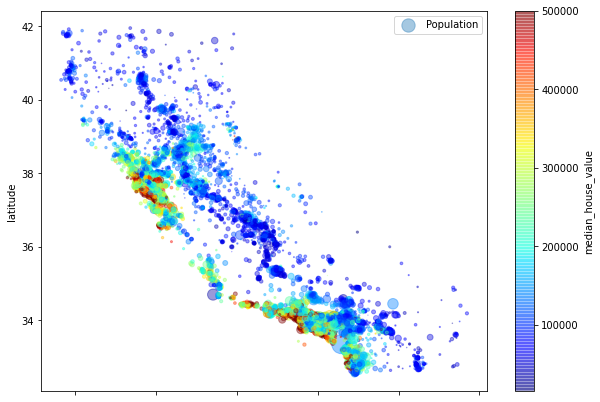

In [ ]:
# Now on to visualizing housing prices paired with coordinates
housing_df.plot(kind="scatter", x= "longitude", y="latitude", alpha = 0.4, s= housing_df['population']/100, label="Population", 
                figsize=(10,7), c= "median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()


In [ ]:
# Compute the Pearson's r between our attribute and label (housing price)
corr_matrix = housing_df.corr()
# Specify label and output results
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fdb8e5990>,
      dtype=object)

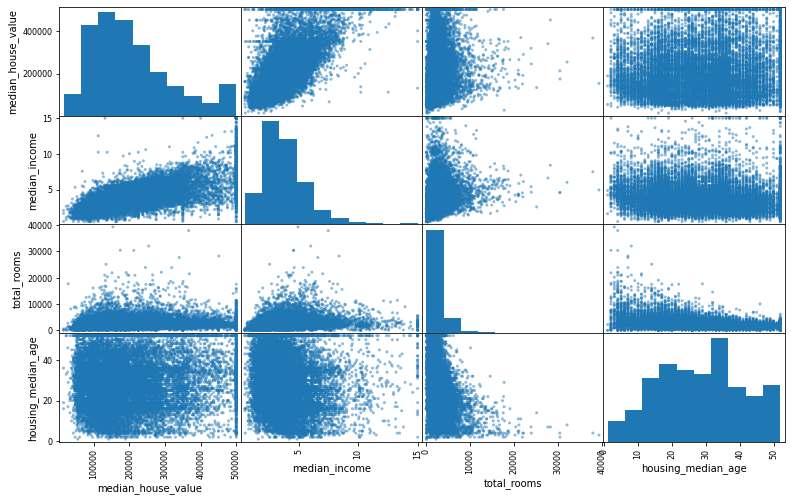

In [ ]:
# This is a way to look between correlations between the variables themselves
# Total of 11*11 = 121 ways to plot it, so we won't do all of them
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing_df[attributes], figsize=(13,8))

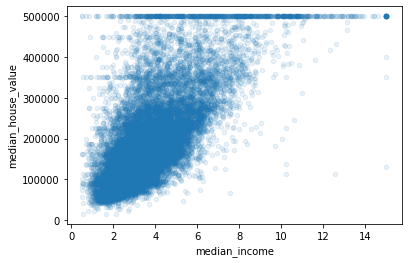

In [ ]:
# Median Income had the highest r value with our label, so let's look a little closer
housing_df.plot(kind = "scatter", x="median_income", y="median_house_value", alpha=0.1)
# We'll need to fix that cap at 500,000, which we'll do later

In [ ]:
# Now we are going to combine some attributes
housing_df["rooms_per_household"] = housing_df["total_rooms"]/housing_df["households"]
housing_df["bedrooms_per_room"] = housing_df["total_bedrooms"] / housing_df["total_rooms"]
housing_df["population_per_household"] = housing_df["population"]/housing_df["households"]

In [ ]:
# Now let's look at the r^2 matrix again 
corr_matrix = housing_df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

Apparently houses with a lower bedroom/ room ratio tend to be more expensive. The number of rooms per household is also more informative than the total number of rooms in a district — obviously the larger the houses, the more expensive they are.

Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (p. 62). O'Reilly Media. Kindle Edition. 

In [ ]:
# Revert to clean dataset as we realy begin

housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"]. copy()

# I don't think we have any NaN values, but just in case we will drop them
housing.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29,3873,797.0,2237,706,2.1736,INLAND
15502,-117.23,33.09,7,5320,855.0,2015,768,6.3373,NEAR OCEAN
2908,-119.04,35.37,44,1618,310.0,667,300,2.8750,INLAND
14053,-117.13,32.75,24,1877,519.0,898,483,2.2264,NEAR OCEAN
20496,-118.70,34.28,27,3536,646.0,1837,580,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14,6665,1231.0,2026,1001,5.0900,<1H OCEAN
12661,-121.42,38.51,15,7901,1422.0,4769,1418,2.8139,INLAND
19263,-122.72,38.44,48,707,166.0,458,172,3.1797,<1H OCEAN
19140,-122.70,38.31,14,3155,580.0,1208,501,4.1964,<1H OCEAN


In [ ]:
# Most Machine Learning algorithms prefer to work with numbers, so let’s convert these categories from text to numbers. For this, we can use Scikit-Learn’s OrdinalEncoder class:
# from sklearn.preprocessing import OrdinalEncoder
# ordinal_encoder = OrdinalEncoder()
# housing_categorical = ordinal_encoder.fit_transform(housing_df["ocean_proximity"])

In [ ]:
# Create Dummy Variables for the ocean proximity metric
for col in housing_df:
  if col == 'ocean_proximity':
    housing_df = housing_df.join(pd.get_dummies(housing_df[col], prefix=col, drop_first=True))
    housing_df = housing_df.drop(columns=[col])
# Alternatively, we could do this:
# from sklearn.preprocessing import OneHotEncoder 
# cat_encoder = OneHotEncoder()
# housing_cat_1hot = cat_encoder.fit_transform("ocean_proximity") 
# housing_cat_1hot
# To turn it into an array instead of a sparse matrix
# housing_cat_1hot.toarray()

#Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (p. 67). O'Reilly Media. Kindle Edition. 

In [ ]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,-121.46,38.52,29,3873,797.0,2237,706,2.1736,72100,5.485836,0.205784,3.168555,1,0,0,0
15502,-117.23,33.09,7,5320,855.0,2015,768,6.3373,279600,6.927083,0.160714,2.623698,0,0,0,1
2908,-119.04,35.37,44,1618,310.0,667,300,2.8750,82700,5.393333,0.191595,2.223333,1,0,0,0
14053,-117.13,32.75,24,1877,519.0,898,483,2.2264,112500,3.886128,0.276505,1.859213,0,0,0,1
20496,-118.70,34.28,27,3536,646.0,1837,580,4.4964,238300,6.096552,0.182692,3.167241,0,0,0,0


In [ ]:
# Custom Transformers
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room=True) : # no arguments
    self.add_bedrooms_per_room = add_bedrooms_per_room

  def fit(self, X, y=None):
    return self
  def transform(self, X):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]
      
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs = attr_adder.transform(housing_df.values)

In [ ]:
# Data Transformation/Feature Scaling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # this should be part of StandardScalar, but for some reason wasn't recognized


num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy="median")),
                         ('attribs_adder',CombinedAttributesAdder()),
                         ('std_scalar', StandardScaler()),])

# they will come in handy later for hyperparameter tuning.


In [ ]:
housing_df1 = housing_df.copy()

In [ ]:
# Next we are going to us a column transformer package to quickly apply a base transformation to all numeric columns.
from sklearn.compose import ColumnTransformer
# Distinguish numerical-only columns
# categorical_attribs = housing_df['ocean_proximity_INLAND',	'ocean_proximity_ISLAND',	'ocean_proximity_NEAR BAY',	'ocean_proximity_NEAR OCEAN']

proxy_df = housing_df.copy()
housing_num = proxy_df.drop(columns=['ocean_proximity_INLAND',	'ocean_proximity_ISLAND',	'ocean_proximity_NEAR BAY',	'ocean_proximity_NEAR OCEAN'], axis=1)
# num_attributes = list(housing_num)
# imputer = SimpleImputer(strategy="median")
# imputer.fit(housing_num['bedrooms_per_room', 'total_bedrooms'])
housing_df = housing_df.dropna()

In [ ]:
from sklearn.impute import SimpleImputer
# Apply a median imputation for all missing/null values in our df
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_num)
# OK, now let's join the df with the imputed values into our df that has our categorical columns
housing_df = pd.DataFrame(housing_df, columns = housing_num.columns, index = housing_num.index)

In [ ]:
# Training and evaluating dataset using linear regression
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
# It was having a hard time with the long int64s, so trying this
housing_df = housing_df.round(3)
# And this, after chekcing for null values
# print(np.all(np.isnan(housing_df)))
housing_df = np.nan_to_num(housing_df)
linear_regression.fit(housing_df, housing_labels)



LinearRegression()

In [ ]:
# Let’s try it out on a few instances from the training set:
# Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (p. 72). O'Reilly Media. Kindle Edition. 

# some_data = housing_df.iloc[:5]
# some_lables = housing_labels.iloc[:5]
# some_data_prepared = full_pipeline.transform(some_data)

lin_reg = LinearRegression()
lin_reg.fit(housing_df, housing_labels)

predictions = lin_reg.predict(housing_df)
predictions
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(housing_labels, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

10514.38598778517

In [ ]:
# Train model using Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_df, housing_labels)
# Evaluate model
housing_predictions = tree_reg.predict(housing_df) # Remember, the smaller the better
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
# Results are a bit better than the linear model, but still not very good

10421.103545953016

In [ ]:
# Use the same model approach, but split data using K-folds approach
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_df, housing_labels, 
                         scoring = "neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores) # just to make it positive

array([14049.8325649 , 13268.06072923,  9218.94827934,  9321.1240972 ,
        8282.79860158,  9480.54647848, 12805.03740295,  8197.28385955,
       10046.0445468 ,  7726.92432264])

In [ ]:
# Create function to display results

def display_scores(scores):
  print("Scores: ", scores)
  print("Mean: ", scores.mean())
  print("Standard deviation:", scores.std())

# Call function
display_scores(tree_rmse_scores)
# Definately an improvement! 

Scores:  [14049.8325649  13268.06072923  9218.94827934  9321.1240972
  8282.79860158  9480.54647848 12805.03740295  8197.28385955
 10046.0445468   7726.92432264]
Mean:  10239.66008826876
Standard deviation: 2169.87408598634


In [ ]:
# Will not fine tune parameters since this dataset and model doesn't have any practical utility 
# because it is so old. However, the page 77 of the SKLearn book provides the function on how to do that.

In [ ]:
# This would be for the confidence interval, but my df is messed up and won't drop anything, 
# so I am just going to comment it out so I can reference it later

# X_test_prepared = housing_df.drop("median_house_value", axis=1)
# y_test = housing_df["median_house_value"].copy()

# final_predictions = predictions.predict(X_test_prepared)
# from scipy import stats
# confidence = .95
# squared_errors = (predictions - y_test) ** 2

# np.sqrt(stats.t.interval(confidence, len(squared_errors) -1,
#                          loc = squared_errors.mean), scale=stats.sem(squared_errors)))

AttributeError: ignored